<a href="https://colab.research.google.com/github/El-Ikhsan/sistem-magang/blob/ai-training/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.4 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
import yaml
import shutil
from google.colab import drive

drive.mount('/content/drive')

GDRIVE_PROJECT_PATH = "/content/drive/MyDrive/KTP_YOLO_Project"
os.makedirs(GDRIVE_PROJECT_PATH, exist_ok=True)

rf = Roboflow(api_key="aTTseMmUXoqect0UMDjY")
project = rf.workspace("ktpmagang").project("ktp-object-detection-efgu1")
dataset = project.version(1).download("yolov8")

source_dataset_path = dataset.location
destination_dataset_path = os.path.join(GDRIVE_PROJECT_PATH, os.path.basename(source_dataset_path))

if os.path.exists(destination_dataset_path):
    shutil.rmtree(destination_dataset_path)

shutil.copytree(source_dataset_path, destination_dataset_path)
print(f"Dataset berhasil disalin ke: {destination_dataset_path}")

model = YOLO("yolov8m.pt")

config = {
    'data': os.path.join(destination_dataset_path, 'data.yaml'),
    'epochs': 150,
    'imgsz': 640,
    'batch': 16,
    'project': GDRIVE_PROJECT_PATH,
    'name': "ktp_yolov8m_prod",
    'lr0': 0.001,
    'lrf': 0.01,
    'optimizer': "AdamW",
    'weight_decay': 0.0005,
    'momentum': 0.937,
    'warmup_epochs': 3,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'augment': True,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 10.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 2.0,
    'perspective': 0.001,
    'flipud': 0.1,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.2,
    'copy_paste': 0.1,
    'erasing': 0.4,
    'patience': 30,
    'device': "0",
    'workers': 8,
    'single_cls': False,
    'pretrained': True,
    'resume': False,
    'dropout': 0.2,
    'iou': 0.7,
    'rect': False,
    'cos_lr': True
}

results = model.train(**config)

run_path = os.path.join(GDRIVE_PROJECT_PATH, config['name'])
best_model_path = os.path.join(run_path, 'weights', 'best.pt')
best_model = YOLO(best_model_path)

metrics = best_model.val(
    data=os.path.join(destination_dataset_path, 'data.yaml'),
    split='val',
    batch=16,
    imgsz=640,
    conf=0.7,
    iou=0.7
)
print(f"mAP50-95: {metrics.box.map}")

best_model.export(format="onnx", simplify=True)

with open(os.path.join(run_path, 'train_config.yaml'), 'w') as f:
    yaml.dump(config, f)

print(f"Pelatihan selesai. Semua hasil disimpan di: {run_path}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ktp-object-detection-1 in yolov8:: 100%|██████████| 3168/3168 [00:00<00:00, 5320.58it/s]


Dataset berhasil disalin ke: /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1


Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ktp_yolov8m_prod, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=3

Overriding model.yaml nc=80 with nc=17

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192,

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.2 ms, read: 28.7±14.1 MB/s, size: 61.1 KB)


train: Scanning /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/train/labels... 1464 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1464/1464 [00:18<00:00, 78.52it/s] 


train: New cache created: /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1502, len(boxes) = 24930. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.7±0.9 ms, read: 29.8±13.6 MB/s, size: 61.1 KB)


val: Scanning /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/valid/labels... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 88.89it/s]

val: New cache created: /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 85, len(boxes) = 1310. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       6.5G      1.542      2.117      1.362        209        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         77       1310      0.807      0.806      0.846      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      6.62G      1.328      1.261      1.261        216        640: 100%|██████████| 92/92 [00:52<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         77       1310      0.857       0.89      0.901      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      6.52G      1.316      1.185      1.261        261        640: 100%|██████████| 92/92 [00:52<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         77       1310      0.896      0.901      0.927      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.46G      1.288      1.099      1.245        251        640: 100%|██████████| 92/92 [00:58<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         77       1310      0.927      0.934      0.938      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.64G      1.269      1.036      1.234        237        640: 100%|██████████| 92/92 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         77       1310      0.935      0.932      0.934       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      6.52G      1.247     0.9983      1.219        222        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         77       1310      0.935      0.942      0.942      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      6.67G      1.232     0.9739      1.216        256        640: 100%|██████████| 92/92 [00:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         77       1310      0.931      0.933      0.937      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.68G      1.221     0.9552      1.202        245        640: 100%|██████████| 92/92 [00:58<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         77       1310      0.942      0.946      0.948      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.68G      1.188     0.9307      1.185        289        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         77       1310      0.934       0.94      0.943      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.97G      1.188     0.9147      1.185        250        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         77       1310      0.949      0.956      0.954      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.62G      1.154     0.8845      1.162        233        640: 100%|██████████| 92/92 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         77       1310      0.943      0.942      0.949      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       6.6G      1.165     0.9057      1.179        288        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         77       1310      0.943      0.958      0.955      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.73G      1.154     0.8921      1.176        205        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         77       1310      0.938      0.948      0.946      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.66G      1.182     0.8954       1.18        229        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         77       1310      0.936      0.951      0.948      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       6.9G      1.139     0.8418      1.152        259        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         77       1310      0.952      0.954      0.956      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.66G      1.136     0.8645      1.159        184        640: 100%|██████████| 92/92 [00:59<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         77       1310      0.948      0.951      0.945      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      6.57G      1.143     0.8721      1.167        268        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         77       1310      0.944      0.956      0.961      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      6.71G      1.136     0.8301      1.152        235        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         77       1310      0.951      0.959      0.953      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150       6.6G      1.116     0.8324      1.152        314        640: 100%|██████████| 92/92 [00:55<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         77       1310      0.938      0.947      0.953      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      6.85G      1.115     0.8405      1.146        278        640: 100%|██████████| 92/92 [00:55<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         77       1310      0.937      0.949      0.954      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      6.62G      1.102      0.835      1.143        228        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         77       1310       0.95       0.96      0.955      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      6.54G      1.066     0.7926       1.12        211        640: 100%|██████████| 92/92 [00:58<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         77       1310      0.949      0.959      0.955      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      6.72G      1.104      0.813      1.145        150        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         77       1310      0.955      0.961      0.955      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      6.84G      1.111     0.8233       1.14        232        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         77       1310      0.945      0.952      0.953      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      7.03G      1.084     0.7792      1.127        185        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         77       1310      0.948      0.962      0.959       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.38G      1.096     0.7997      1.135        321        640: 100%|██████████| 92/92 [00:58<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         77       1310      0.955       0.96       0.96      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      6.62G      1.054     0.7605      1.122        243        640: 100%|██████████| 92/92 [00:53<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         77       1310      0.944      0.949      0.943      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       6.7G      1.098     0.8168      1.144        249        640: 100%|██████████| 92/92 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         77       1310      0.946      0.958      0.958      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.63G      1.067     0.7706      1.117        183        640: 100%|██████████| 92/92 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         77       1310      0.948      0.959      0.961       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.57G       1.07     0.7773      1.125        210        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         77       1310      0.947      0.955      0.961      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.67G       1.07     0.7712      1.123        278        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         77       1310      0.953      0.952       0.96      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.68G       1.06     0.7711      1.119        313        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]

                   all         77       1310      0.945      0.958      0.958      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.62G      1.053      0.754      1.117        215        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         77       1310      0.945      0.956      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       6.4G      1.073     0.7812      1.127        311        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         77       1310      0.952      0.961       0.96      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.66G      1.053     0.7655      1.115        232        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         77       1310      0.952      0.961      0.961      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.94G      1.044     0.7543      1.106        271        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         77       1310      0.945      0.959      0.951      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.57G      1.051     0.7656      1.118        252        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         77       1310      0.949      0.957      0.953      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      6.84G      1.038     0.7422      1.104        139        640: 100%|██████████| 92/92 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all         77       1310      0.953       0.96      0.962      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      6.89G      1.032     0.7451      1.104        252        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         77       1310       0.95      0.961      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      7.15G      1.043      0.752      1.116        225        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         77       1310       0.95      0.961      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      6.87G      1.043     0.7598      1.112        218        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         77       1310      0.951      0.961      0.953        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      6.67G      1.031     0.7409       1.11        217        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         77       1310      0.952      0.961       0.96       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.51G      1.027     0.7253        1.1        266        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         77       1310      0.946      0.958      0.948       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.79G      1.024     0.7321      1.105        390        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         77       1310      0.944      0.957      0.958      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.87G      1.027     0.7216      1.101        207        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         77       1310      0.949      0.959      0.959      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.61G      1.019      0.728      1.098        260        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         77       1310      0.947      0.959      0.952      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.92G      1.016     0.7221      1.098        244        640: 100%|██████████| 92/92 [00:54<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         77       1310      0.952      0.963       0.96      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.72G      1.017     0.7133      1.101        335        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         77       1310       0.95      0.957      0.961      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      7.07G      1.015     0.7317      1.107        277        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         77       1310      0.954      0.963      0.964      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      7.23G      1.019     0.7297      1.105        223        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         77       1310      0.951      0.953      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      6.39G      1.007     0.7188      1.098        191        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         77       1310      0.956       0.96      0.959      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      6.68G     0.9981     0.7075      1.087        264        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         77       1310      0.948      0.956      0.959      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      6.61G       1.01     0.7009      1.096        290        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         77       1310      0.953      0.957      0.959       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      6.46G      1.004     0.7155      1.094        270        640: 100%|██████████| 92/92 [00:54<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         77       1310      0.953      0.954      0.948      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      6.66G      1.002      0.704      1.093        259        640: 100%|██████████| 92/92 [00:54<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         77       1310       0.95      0.958      0.953      0.726
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 25, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



55 epochs completed in 0.881 hours.
Optimizer stripped from /content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,849,603 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.94s/it]


                   all         77       1310      0.945      0.952      0.956      0.713
                 agama         77         77      0.947      0.961      0.975      0.792
                alamat         77         77      0.918      0.935      0.934      0.672
        berlaku_hingga         77         77      0.961      0.974      0.976      0.769
             gol_darah         77         77      0.842       0.74      0.858      0.393
                    jk         77         77      0.917      0.974      0.966      0.776
             kecamatan         77         77      0.946      0.961      0.962      0.751
              kel_desa         77         77      0.949       0.96      0.959      0.723
                   kwg         77         77       0.98      0.987       0.99      0.757
                  nama         76         76      0.934      0.961      0.962      0.718
                   nik         77         77      0.982      0.987      0.984      0.728
             pekerjaa

val: Scanning /content/drive/MyDrive/KTP_YOLO_Project/ktp-object-detection-1/valid/labels.cache... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 85, len(boxes) = 1310. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


                   all         77       1310      0.968      0.868      0.922      0.741
                 agama         77         77      0.961      0.961      0.976      0.831
                alamat         77         77      0.938      0.792       0.88      0.676
        berlaku_hingga         77         77      0.974      0.961      0.973      0.784
             gol_darah         77         77          1      0.039      0.519      0.345
                    jk         77         77      0.948      0.948      0.958      0.821
             kecamatan         77         77      0.957       0.87      0.925      0.769
              kel_desa         77         77      0.959      0.922       0.95      0.755
                   kwg         77         77      0.987      0.987      0.989      0.786
                  nama         76         76      0.973      0.934      0.959      0.752
                   nik         77         77      0.986      0.935      0.962      0.824
             pekerjaa

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,849,603 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 81.3±149.6 MB/s, size: 66.9 KB)


val: Scanning /content/ktp-object-detection-1/valid/labels... 77 images, 0 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<00:00, 396.96it/s]

val: New cache created: /content/ktp-object-detection-1/valid/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 85, len(boxes) = 1310. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


                   all         77       1310      0.962      0.937      0.954      0.755
                 agama         77         77      0.961      0.961      0.976      0.831
                alamat         77         77      0.947      0.922      0.942      0.717
        berlaku_hingga         77         77      0.962      0.974      0.979      0.787
             gol_darah         77         77      0.957      0.584      0.763      0.392
                    jk         77         77      0.949      0.974      0.971      0.829
             kecamatan         77         77      0.949      0.961      0.968      0.799
              kel_desa         77         77      0.961      0.948      0.962       0.76
                   kwg         77         77      0.987      0.987      0.989      0.786
                  nama         76         76      0.947      0.947      0.965      0.753
                   nik         77         77      0.987      0.974      0.981      0.835
             pekerjaa

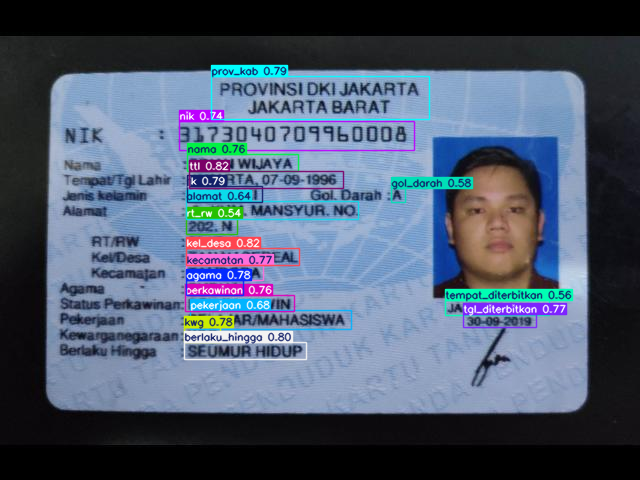

Results saved to ktp_detection_result.jpg


In [5]:
from google.colab.patches import cv2_imshow

# 4. Validate and Show Sample Prediction
best_model = YOLO("/content/drive/MyDrive/KTP_YOLO_Project/ktp_yolov8m_prod/weights/best.pt")

# Sample validation
val_results = best_model.val(
    data=f"{dataset.location}/data.yaml",
    split="val",
    batch=16,
    imgsz=640,
    conf=0.5,
    iou=0.6
)

print(f"\nValidation mAP50-95: {val_results.box.map:.3f}")

# 5. Test Prediction on Sample Image
sample_img_path = "/content/349-ktp_jpg.rf.b03b736d7e33edecd336e46764ea2323.jpg"  # Replace with your image path
if os.path.exists(sample_img_path):
    test_results = best_model.predict(
        source=sample_img_path,
        conf=0.5,
        imgsz=640,
        show_labels=True,
        show_conf=True
    )

    for result in test_results:
        plotted_img = result.plot(line_width=1)
        cv2_imshow(plotted_img)

        # Save results
        result.save("ktp_detection_result.jpg")
        print("Results saved to ktp_detection_result.jpg")
else:
    print("Sample image not found, using validation image instead")
    val_img = next(iter(dataset.location.glob("valid/images/*.jpg")))
    test_results = best_model.predict(val_img)
    cv2_imshow(test_results[0].plot())